# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


# Goal:
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read File

In [2]:
bike_sharing_org = pd.read_csv("F:/Decodr/Complete/Case Studies/Case Study 5 _ Bike Sharing/day.csv", index_col=0);
bike_sharing_org['dteday'] = pd.to_datetime(bike_sharing_org['dteday'])
print(bike_sharing_org.shape)
bike_sharing_org.head()

(730, 15)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
def findMissingValuesInData(df):
        missingValue = df.isnull().sum()
        missingValuePercent = 100 * missingValue / len(df)
        missingValueTable = pd.concat([missingValue, missingValuePercent], axis=1)
        renamedColumnsOfTable = missingValueTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        renamedColumnsOfTable = renamedColumnsOfTable[renamedColumnsOfTable.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(6)
        print ("Data has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(renamedColumnsOfTable.shape[0]) +
              " columns that have missing values.")
        return renamedColumnsOfTable
    
findMissingValuesInData(bike_sharing_org)
print()
bike_sharing_org.info()

Data has 15 columns.
There are 0 columns that have missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.2 KB


In [4]:
# corrMatrix = bike_sharing_org.corr()
# corrMatrix

In [5]:
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [6]:
# # with regression
# sns.pairplot(bike_sharing_org, height=6, aspect =1)
# plt.show()

In [7]:
def plotMyLineGraph(x,y,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, y)
    plt.xticks(x,rotation='vertical')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()
    
def plotMyBarGraph (x,y,title,xlabel,ylabel, xlabel_seq=None):
    plt.rcParams["figure.figsize"] = (10,5) #Specifies the size of plot
    plt.bar(np.arange(len(x)), y, align='center', alpha=0.7)
    plt.xticks(np.arange(len(x)), xlabel_seq if xlabel_seq else x)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    plt.show()

In [8]:
bike_sharing_org.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## Assigning redabale Strings to Categorical data for Visualisation 

In [9]:
bike_sharing = bike_sharing_org[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
# bike_sharing["workingday_holiday"] = bike_sharing["workingday"]+(bike_sharing["holiday"]*2)
# bike_sharing["workingday_holiday"] = bike_sharing["workingday_holiday"].replace(0, "NO-work,NO-holiday")
# bike_sharing["workingday_holiday"] = bike_sharing["workingday_holiday"].replace(1, "work,No-holiday")
# bike_sharing["workingday_holiday"] = bike_sharing["workingday_holiday"].replace(2, "NO-work,holiday")

bike_sharing['YearMonth'] = (bike_sharing.yr+2018)*100+bike_sharing.mnth 
def num_month_to_str(m):
    return m.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike_sharing[["mnth"]] = bike_sharing[["mnth"]].apply(num_month_to_str)
bike_sharing['actual_yr'] = bike_sharing['yr']+2018

bike_sharing.loc[(bike_sharing['season'] == 1),'season'] = "spring"
bike_sharing.loc[(bike_sharing['season'] == 2),'season'] = "summer"
bike_sharing.loc[(bike_sharing['season'] == 3),'season'] = "fall"
bike_sharing.loc[(bike_sharing['season'] == 4),'season'] = "winter"

bike_sharing.loc[(bike_sharing['weathersit'] == 1),'weathersit'] = "clear"
bike_sharing.loc[(bike_sharing['weathersit'] == 2),'weathersit'] = "cloudy"
bike_sharing.loc[(bike_sharing['weathersit'] == 3),'weathersit'] = "light rain"
bike_sharing.loc[(bike_sharing['weathersit'] == 4),'weathersit'] = "heavy rain"

bike_sharing["holiday"] = ["Yes" if x else "No" for x in bike_sharing["holiday"]]
bike_sharing["workingday"] = ["Yes" if x else "No" for x in bike_sharing["workingday"]]

def num_weekday_to_str(m):
    return m.map({1:"Wed",2:"Thu",3:"Fri",4:"Sat",5:"Sun",6:"Mon",0:"Tue"})
bike_sharing[["weekday"]] = bike_sharing[["weekday"]].apply(num_weekday_to_str)

bike_sharing['day'] = pd.DatetimeIndex(bike_sharing['dteday']).day



bike_sharing

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,YearMonth,actual_yr,day
instant,,,,,,,,,,,,,,,,,,
1,2018-01-01,spring,0,Jan,No,Mon,No,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,201801,2018,1
2,2018-02-01,spring,0,Jan,No,Tue,No,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,201801,2018,1
3,2018-03-01,spring,0,Jan,No,Wed,Yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,201801,2018,1
4,2018-04-01,spring,0,Jan,No,Thu,Yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,201801,2018,1
5,2018-05-01,spring,0,Jan,No,Fri,Yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,201801,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,spring,1,Dec,No,Sat,Yes,cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114,201912,2019,27
727,2019-12-28,spring,1,Dec,No,Sun,Yes,cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095,201912,2019,28
728,2019-12-29,spring,1,Dec,No,Mon,No,cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341,201912,2019,29


In [10]:
bike_sharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'YearMonth', 'actual_yr', 'day'],
      dtype='object')

# Bar Plot for Categorical type data 

1) season Vs Total Bikes on Rentals.
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


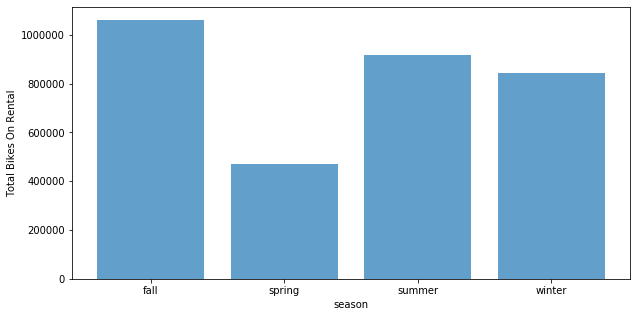




2) actual_yr Vs Total Bikes on Rentals.
2019    365
2018    365
Name: actual_yr, dtype: int64


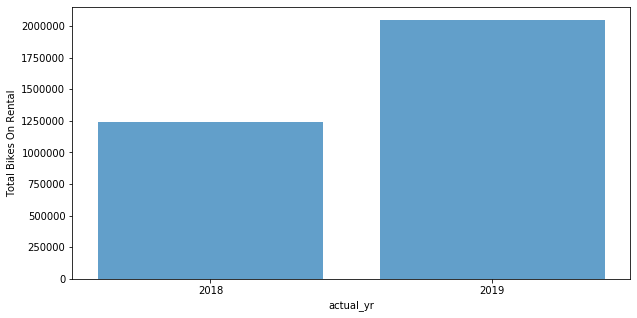




3) mnth Vs Total Bikes on Rentals.
Aug    62
Dec    62
Jul    62
Jan    62
May    62
Mar    62
Oct    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64


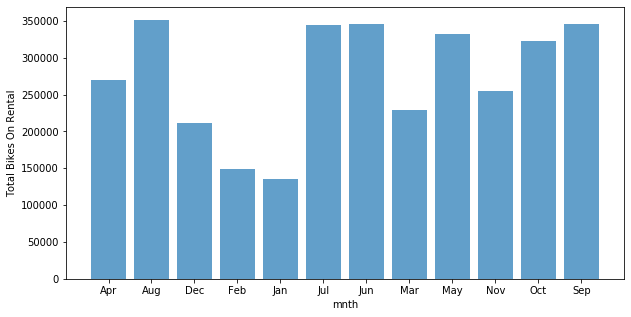




4) holiday Vs Total Bikes on Rentals.
No     709
Yes     21
Name: holiday, dtype: int64


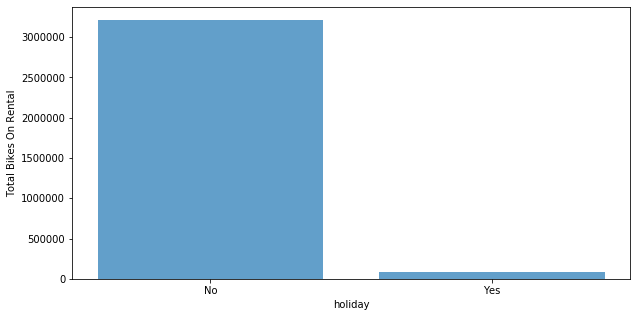




5) weekday Vs Total Bikes on Rentals.
Wed    105
Mon    105
Tue    105
Thu    104
Sun    104
Sat    104
Fri    103
Name: weekday, dtype: int64


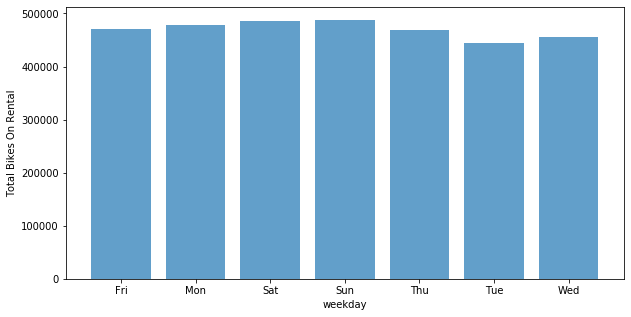




6) workingday Vs Total Bikes on Rentals.
Yes    499
No     231
Name: workingday, dtype: int64


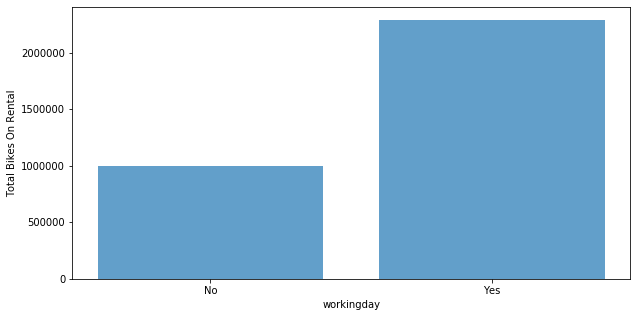




7) weathersit Vs Total Bikes on Rentals.
clear         463
cloudy        246
light rain     21
Name: weathersit, dtype: int64


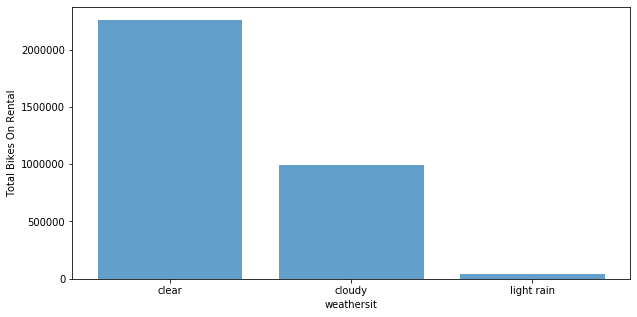




8) day Vs Total Bikes on Rentals.
16    24
15    24
2     24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
1     24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
30    22
29    22
31    14
Name: day, dtype: int64


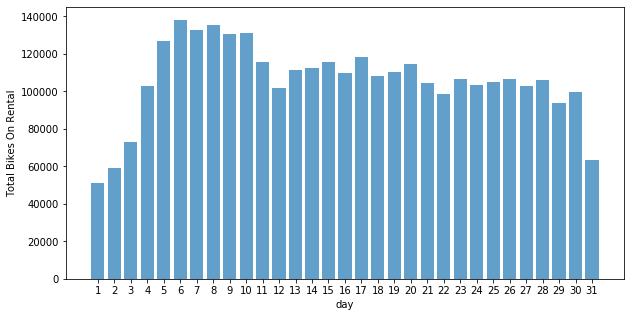

In [11]:
i = 1
# for col in ['season', 'actual_yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'workingday_holiday']:
for col in ['season', 'actual_yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'day']:
    print(f"{i}) {col} Vs Total Bikes on Rentals.")
    i+=1
    tempList = bike_sharing[[col, 'cnt']]
    tempList = tempList.groupby(by=[col]).sum()
    print(bike_sharing[col].value_counts())
#     label_seq = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] if col=='mnth' else None
    plotMyBarGraph(tempList.index, tempList.cnt, '', col, 'Total Bikes On Rental')
    print("\n\n")

## Analysis of Box Plots above

##### 1) season Vs Total Bikes on Rentals.
Seems in Spring season, minimum number of Bikes were rented, compare to other three season which approx. have same number of bikes on rent.

##### 2) actual_yr Vs Total Bikes on Rentals.
2019 has almost 60% hike in business compare to 2018.

##### 3) mnth Vs Total Bikes on Rentals.
Shows May to September is peak season for business.

##### 4) holiday Vs Total Bikes on Rentals.
Bike rental count on Holidays is almost nigligible, most of business happens on non-holiday days.

##### 5) weekday Vs Total Bikes on Rentals.
Seems day of week doesnt matter business is almost same on all days of week.

##### 6) workingday Vs Total Bikes on Rentals.
More than twice business happens if it is working day. Result inline with Graph 4 above, on holiday almost no business. 

##### 7) weathersit Vs Total Bikes on Rentals.
Number of Weather situation corrosponds to --
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

We can see absolutely no bikes on rent if weather is "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " which is kind of obvious. Most business happens when weather is Clear, Few clouds, Partly cloudy, Partly cloudy. and least on Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


##### 8) day Vs Total Bikes on Rentals.
Looks like start of month is bit slow but it gains pace quickly from mid of first week till end of second week, business is high, but towards end of month business slows down.


#### From all above charts it is clear that, most of bikes are hired on work day, may be customer prefer their office comute with these rented bikes. We should explore more on this opportunity. whereas it seems on holiday bike rent business is very slow. One reason of this behaviour could be customer prefer staying at home on holidays. We can run a campaign so  that customers will be egar to enjoy bike ride on holidays too.

In [12]:
def creatBins(df,col_list,bins=-1):
    temp_df = df[col_list]
    if(bins < 1):
        desc_df = temp_df.describe()
    #     label_list=[col_list[0]+"<"+str(desc_df[col_list[0]]["25%"]),
    #                 str(desc_df[col_list[0]]["25%"])+"<"+col_list[0]+"<"+str(desc_df[col_list[0]]["50%"]),
    #                 str(desc_df[col_list[0]]["50%"])+"<"+col_list[0]+"<"+str(desc_df[col_list[0]]["75%"]),
    #                 str(desc_df[col_list[0]]["75%"])+"<"+col_list[0]
    #                ]

        label_list=["Q1 - "+str(desc_df[col_list[0]]["25%"]),"Q2 - "+str(desc_df[col_list[0]]["50%"]),"Q3 - "+str(desc_df[col_list[0]]["75%"]),"Q4 - "+str(temp_df[col_list[0]].max())]
    #     label_list=["Q1","Q2","Q3","Q4"]

        val_list=[]
        val_list.append(temp_df[temp_df[col_list[0]] <= desc_df[col_list[0]]["25%"] ][col_list[1]].sum())
        val_list.append(temp_df[(desc_df[col_list[0]]["25%"]  < temp_df[col_list[0]]) & (temp_df[col_list[0]] <= desc_df[col_list[0]]["50%"]) ][col_list[1]].sum())
        val_list.append(temp_df[(desc_df[col_list[0]]["50%"]  < temp_df[col_list[0]]) & (temp_df[col_list[0]] <= desc_df[col_list[0]]["75%"]) ][col_list[1]].sum())
        val_list.append(temp_df[desc_df[col_list[0]]["75%"]  < temp_df[col_list[0]] ][col_list[1]].sum())
    else:
        offset = (temp_df[col_list[0]].max() - temp_df[col_list[0]].min())/bins
        label_list=[]
        for x in range(bins+1):
            label_list.append(temp_df[col_list[0]].min() + (x*offset))
            
        val_list=[]                
        for count in range(len(label_list)):
            if count == 0:
                val_list.append(temp_df[temp_df[col_list[0]] <= label_list[count] ][col_list[1]].sum())
            else:
                val_list.append(temp_df[(label_list[count-1]  < temp_df[col_list[0]]) & (temp_df[col_list[0]] <= label_list[count]) ][col_list[1]].sum())
        

        
        
    d = {col_list[0]: label_list, col_list[1]: val_list}
    result_df = pd. DataFrame(d)
    return result_df
   

# Line Plot for Continuous data

1) temp Vs Total Bikes on Rentals.


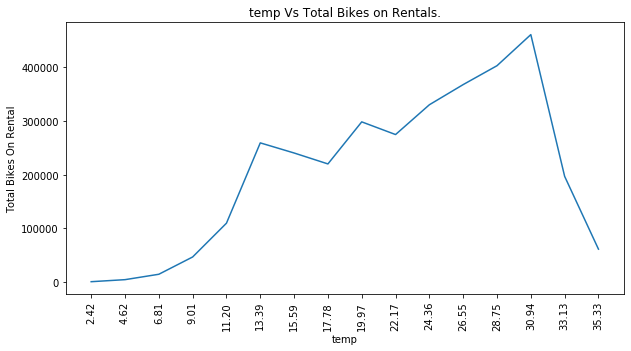




2) atemp Vs Total Bikes on Rentals.


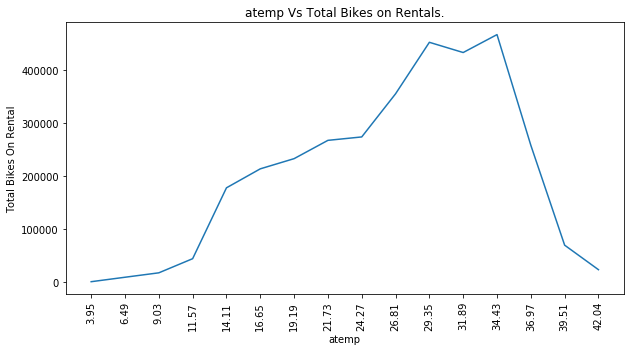




3) hum Vs Total Bikes on Rentals.


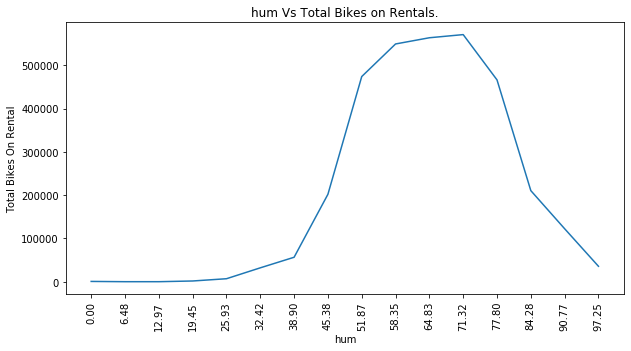




4) windspeed Vs Total Bikes on Rentals.


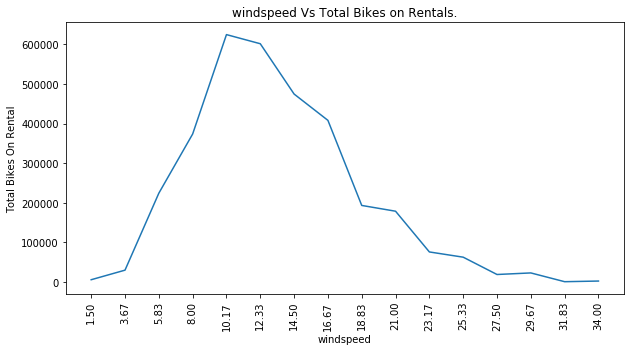

In [13]:
i = 1
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    print(f"{i}) {col} Vs Total Bikes on Rentals.")
    i +=1
    tempList = creatBins(bike_sharing, [col, "cnt"],15)
#     tempList['Year'] = (tempList.index+2018)
    plotMyLineGraph(tempList[col], tempList.cnt, f'{col} Vs Total Bikes on Rentals.', col, 'Total Bikes On Rental')
    print("\n\n")

### Analysis of Line Plots above

##### 1) temp Vs Total Bikes on Rentals. and 2) atemp Vs Total Bikes on Rentals.
It Shows More the Temperature Customer tends more to hire bike.

##### 3) hum Vs Total Bikes on Rentals.
more Humidity also makes customers to hire bikes more, but in still more humidity, customers avoid travelling.  

##### 4) windspeed Vs Total Bikes on Rentals.
Wind speed shows opposite trend, i.e. lower windspeed more trend to hire bike. Whereas higher windspeend lovers the hire rate.  

#### From all above charts we can conclude Whether condition do affect bike hirring rate.

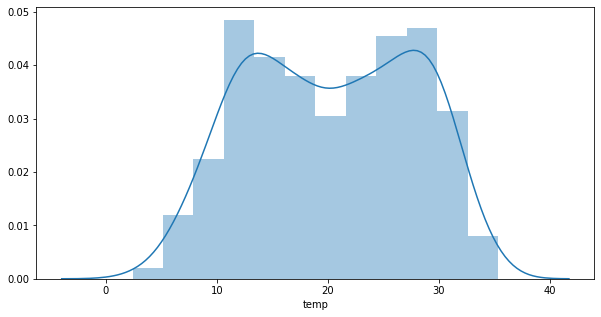

In [14]:
_=sns.distplot(bike_sharing['temp'])

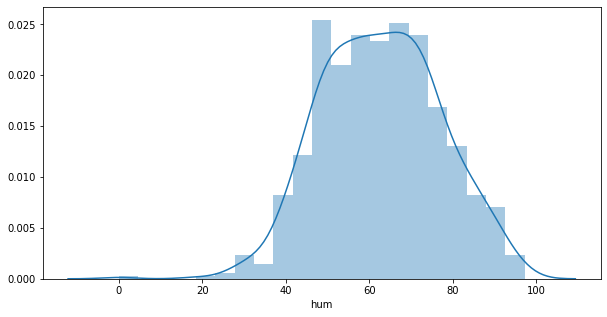

In [15]:
_=sns.distplot(bike_sharing['hum'])

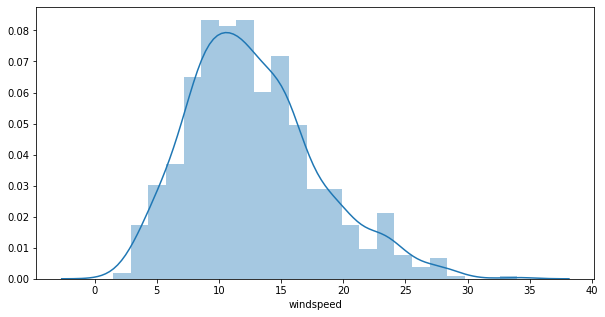

In [16]:
_=sns.distplot(bike_sharing['windspeed'])

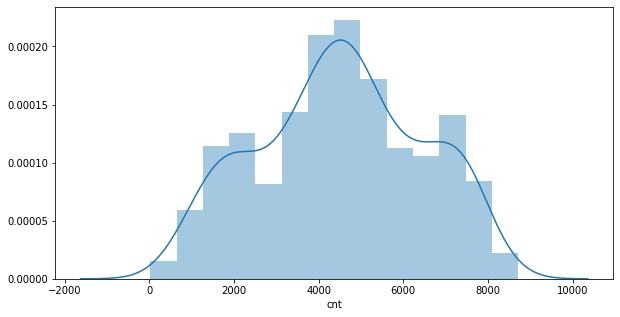

In [17]:
_=sns.distplot(bike_sharing['cnt'])
# _=sns.distplot(bike_sharing['casual'])
# _=sns.distplot(bike_sharing['registered'])


### NOTE : All Above Continuous features looks in Normal Distribution

# Below checking for Outliers

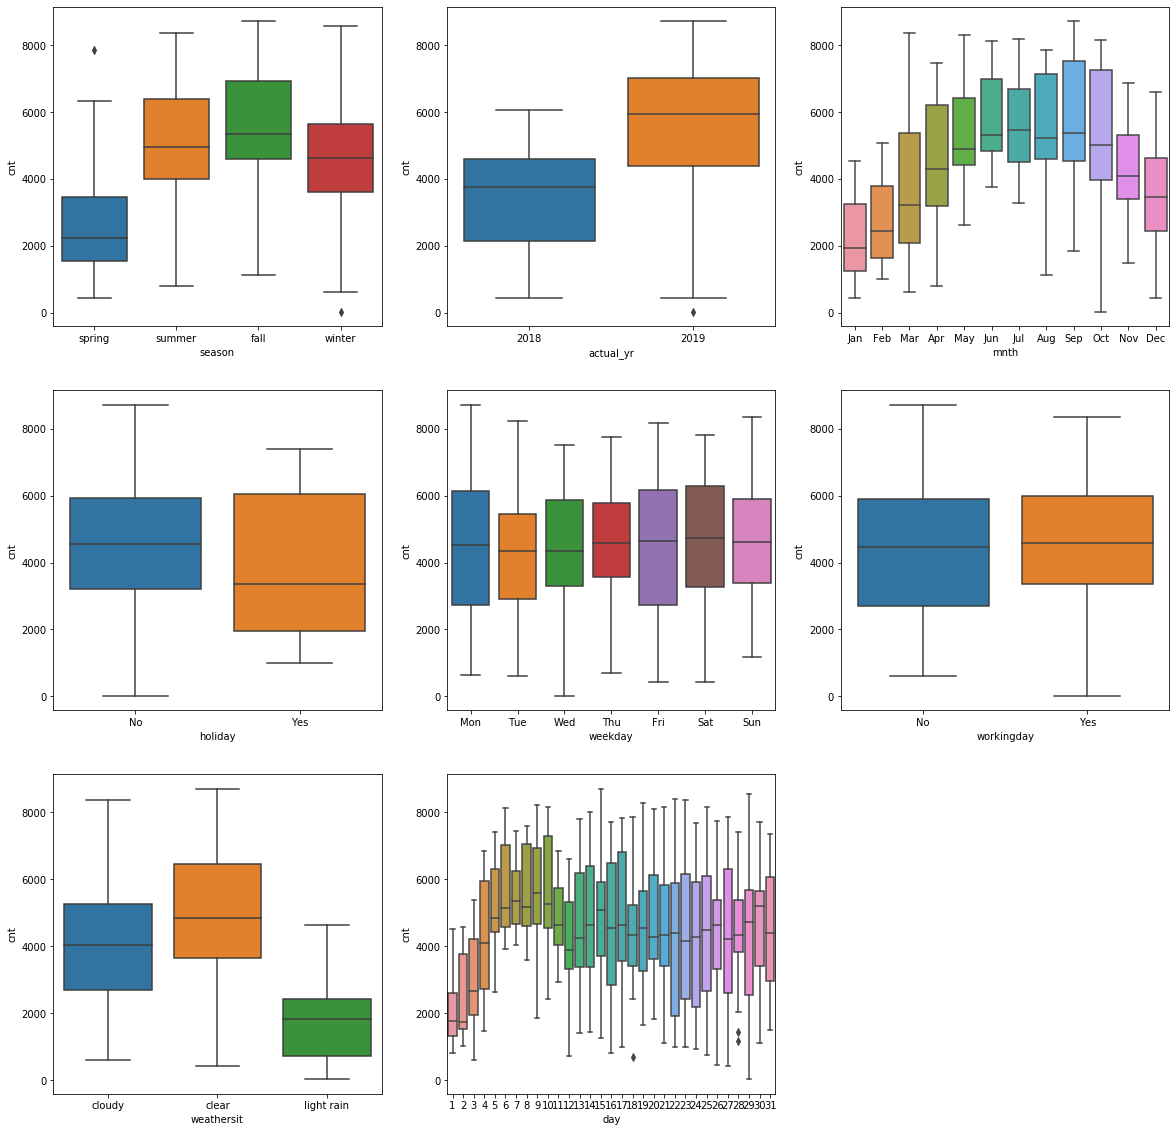

In [18]:
plt.figure(figsize=(20,20))
# plt.subplot(3,3,8)
# sns.boxplot(x="holiday", y="cnt", data=bike_sharing)

for cnt, col in enumerate(['season', 'actual_yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'day']):
    plt.subplot(3,3,cnt+1)
    sns.boxplot(x=bike_sharing[col], y=bike_sharing.cnt) 



## There aren't much outliers in data

In [19]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 18 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
YearMonth     730 non-null int64
actual_yr     730 non-null int64
day           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(6)
memory usage: 128.4+ KB


In [20]:
bike_sharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'YearMonth', 'actual_yr', 'day'],
      dtype='object')

In [21]:
bike_sharing_cont=bike_sharing[['temp', 'hum', 'windspeed', 'cnt','casual','registered']]
bike_sharing_cont

,temp,hum,windspeed,cnt,casual,registered
instant,,,,,,
1,14.110847,80.5833,10.749882,985,331,654
2,14.902598,69.6087,16.652113,801,131,670
3,8.050924,43.7273,16.636703,1349,120,1229
4,8.200000,59.0435,10.739832,1562,108,1454
5,9.305237,43.6957,12.522300,1600,82,1518
...,...,...,...,...,...,...
726,10.420847,65.2917,23.458911,2114,247,1867
727,10.386653,59.0000,10.416557,3095,644,2451
728,10.386653,75.2917,8.333661,1341,159,1182


In [22]:
bike_sharing_cont.corr()['cnt']

temp          0.627044
hum          -0.098543
windspeed    -0.235132
cnt           1.000000
casual        0.672123
registered    0.945411
Name: cnt, dtype: float64

# Checking Correlation between continuous type features 

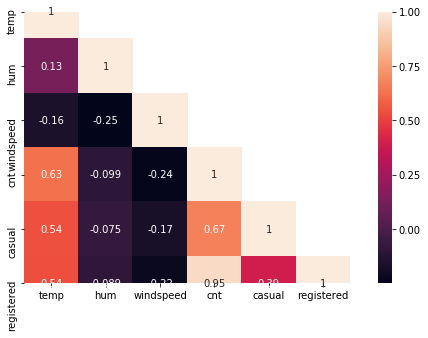

In [23]:
# plt.figure(figsize=(10,5))
mask=np.array(bike_sharing_cont.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(bike_sharing_cont.corr(), mask=mask,annot=True, square=True)
plt.show()

## As Expected High Correlation between cnt, registered and casual,</br> as data says cnt = casul + registered

In [24]:
bike_sharing_cont.describe()

,temp,hum,windspeed,cnt,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849,849.249315,3658.757534
std,7.506729,14.237589,5.195841,1936.011647,686.479875,1559.758728
min,2.424346,0.000000,1.500244,22.000000,2.000000,20.000000
25%,13.811885,52.000000,9.041650,3169.750000,316.250000,2502.250000
50%,20.465826,62.625000,12.125325,4548.500000,717.000000,3664.500000
75%,26.880615,72.989575,15.625589,5966.000000,1096.500000,4783.250000
max,35.328347,97.250000,34.000021,8714.000000,3410.000000,6946.000000


In [25]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 18 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
YearMonth     730 non-null int64
actual_yr     730 non-null int64
day           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(6)
memory usage: 128.4+ KB


In [26]:
bike_sharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'YearMonth', 'actual_yr', 'day'],
      dtype='object')

# Converting, Categorical data to dummy columns.

In [27]:
# bike_sharing_cate=bike_sharing[['season', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']]
bike_sharing_cate = bike_sharing.select_dtypes(include="object")
bike_sharing_cate

,season,mnth,holiday,weekday,workingday,weathersit
instant,,,,,,
1,spring,Jan,No,Mon,No,cloudy
2,spring,Jan,No,Tue,No,cloudy
3,spring,Jan,No,Wed,Yes,clear
4,spring,Jan,No,Thu,Yes,clear
5,spring,Jan,No,Fri,Yes,clear
...,...,...,...,...,...,...
726,spring,Dec,No,Sat,Yes,cloudy
727,spring,Dec,No,Sun,Yes,cloudy
728,spring,Dec,No,Mon,No,cloudy


In [28]:
df=pd.get_dummies(bike_sharing_cate, drop_first=True)
df

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_cloudy,weathersit_light rain
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [29]:
df = pd.merge(df, bike_sharing_cont, on="instant")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
season_spring            730 non-null uint8
season_summer            730 non-null uint8
season_winter            730 non-null uint8
mnth_Aug                 730 non-null uint8
mnth_Dec                 730 non-null uint8
mnth_Feb                 730 non-null uint8
mnth_Jan                 730 non-null uint8
mnth_Jul                 730 non-null uint8
mnth_Jun                 730 non-null uint8
mnth_Mar                 730 non-null uint8
mnth_May                 730 non-null uint8
mnth_Nov                 730 non-null uint8
mnth_Oct                 730 non-null uint8
mnth_Sep                 730 non-null uint8
holiday_Yes              730 non-null uint8
weekday_Mon              730 non-null uint8
weekday_Sat              730 non-null uint8
weekday_Sun              730 non-null uint8
weekday_Thu              730 non-null uint8
weekday_Tue              730 non-null uint8
weekday_Wed    

In [30]:
bike_sharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'YearMonth', 'actual_yr', 'day'],
      dtype='object')

In [31]:
df = pd.merge(df, bike_sharing[['actual_yr', 'day', 'YearMonth']], on="instant")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
season_spring            730 non-null uint8
season_summer            730 non-null uint8
season_winter            730 non-null uint8
mnth_Aug                 730 non-null uint8
mnth_Dec                 730 non-null uint8
mnth_Feb                 730 non-null uint8
mnth_Jan                 730 non-null uint8
mnth_Jul                 730 non-null uint8
mnth_Jun                 730 non-null uint8
mnth_Mar                 730 non-null uint8
mnth_May                 730 non-null uint8
mnth_Nov                 730 non-null uint8
mnth_Oct                 730 non-null uint8
mnth_Sep                 730 non-null uint8
holiday_Yes              730 non-null uint8
weekday_Mon              730 non-null uint8
weekday_Sat              730 non-null uint8
weekday_Sun              730 non-null uint8
weekday_Thu              730 non-null uint8
weekday_Tue              730 non-null uint8
weekday_Wed    

# Dropping cnt, registered and casual from feature dataframe  
### as cnt is target feature, and casual and registered are highly correlated with target feature 

In [32]:
y=df[['cnt']]
x=df.drop(columns=['cnt', 'registered', 'casual'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split 70-30

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=df[['weathersit_light rain','holiday_Yes']])
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)



x_train (511, 30)
x_test (219, 30)
y_train (511, 1)
y_test (219, 1)


# Scaling with Min-Max Scaler 

In [35]:
scaler=MinMaxScaler() 
x_train.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes', 'weathersit_cloudy',
       'weathersit_light rain', 'temp', 'hum', 'windspeed', 'actual_yr', 'day',
       'YearMonth'],
      dtype='object')

In [36]:
x_train[['temp', 'hum', 'windspeed']]=scaler.fit_transform(x_train[['temp', 'hum', 'windspeed']])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
x_test[['temp', 'hum', 'windspeed']]=scaler.fit_transform(x_test[['temp', 'hum', 'windspeed']])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Case 1 : 70-30 data split
## By Linear Reg

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
def lr_stats(x_train,x_test,y_train,y_test):    
    lgr = LinearRegression(fit_intercept=True)

    base_pred = np.mean(y_test)
    print(f"base value {base_pred}")
    base_pred = np.repeat(base_pred, len(y_test ))
    base_mse = mean_squared_error(y_test , base_pred)
    base_rmse = np.sqrt(base_mse)

    print (f"WITH BASE mse :{base_mse} , rmse :{base_rmse}")

    model_lin1 = lgr.fit(x_train , y_train )
    price_pred_lin1 = lgr.predict(x_test )
    lin_mse1 = mean_squared_error(y_test , price_pred_lin1)
    lin_rmse1 = np.sqrt(lin_mse1)
    print (f"mse :{lin_mse1} , rmse :{lin_rmse1}")

    r2train = model_lin1.score(x_train , y_train )
    r2test = model_lin1.score(x_test , y_test )

    print (f"==Train r2 :{r2train} , test r2 :{r2test}")

In [40]:
lr_stats(x_train,x_test,y_train,y_test)

base value cnt    4715.849315
dtype: float64
WITH BASE mse :3605815.1234127725 , rmse :1898.8983973379861
mse :815852.6321787053 , rmse :903.2456101076303
==Train r2 :0.8561167302115807 , test r2 :0.7737397497499732


# Case 1 : 70-30 data split
## By GradientBoostingRegressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
def gbr_stat(x_tr,x_te,y_tr,y_te):
    model=GradientBoostingRegressor()
    model.fit(x_tr,y_tr)
    print(f'==GBR Score : {model.score(x_te,y_te)}')

In [43]:
gbr_stat(x_train,x_test,y_train,y_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


==GBR Score : 0.8016475359600022


# Case 2 : Preserve Time - Series pattern
## By Linear Reg

In [44]:
df.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes', 'weathersit_cloudy',
       'weathersit_light rain', 'temp', 'hum', 'windspeed', 'cnt', 'casual',
       'registered', 'actual_yr', 'day', 'YearMonth'],
      dtype='object')

In [45]:
x_col_list = ['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes', 'weathersit_cloudy',
       'weathersit_light rain', 'temp', 'hum', 'windspeed',
       'actual_yr', 'day', 'YearMonth']
# x_col_list=['actual_yr','day','mnth','season','holiday','weekday','workingday','weathersit','atemp','hum','windspeed']
X_train = df[(df.YearMonth == 201801) | 
(df.YearMonth == 201802) |
(df.YearMonth == 201803) |
(df.YearMonth == 201804) |
(df.YearMonth == 201805) |
(df.YearMonth == 201806) |
(df.YearMonth == 201807) |
(df.YearMonth == 201808) |
(df.YearMonth == 201809) |
(df.YearMonth == 201810) |
(df.YearMonth == 201811) |
(df.YearMonth == 201812) |
(df.YearMonth == 201901) |
(df.YearMonth == 201902) |
(df.YearMonth == 201903) |
(df.YearMonth == 201904) |
(df.YearMonth == 201905) |
(df.YearMonth == 201906) |
(df.YearMonth == 201907) ][x_col_list]
Y_train = df[(df.YearMonth == 201801) | 
(df.YearMonth == 201802) |
(df.YearMonth == 201803) |
(df.YearMonth == 201804) |
(df.YearMonth == 201805) |
(df.YearMonth == 201806) |
(df.YearMonth == 201807) |
(df.YearMonth == 201808) |
(df.YearMonth == 201809) |
(df.YearMonth == 201810) |
(df.YearMonth == 201811) |
(df.YearMonth == 201812) |
(df.YearMonth == 201901) |
(df.YearMonth == 201902) |
(df.YearMonth == 201903) |
(df.YearMonth == 201904) |
(df.YearMonth == 201905) |
(df.YearMonth == 201906) |
(df.YearMonth == 201907) ][['cnt']]

X_test = df[(df.YearMonth == 201908) | 
(df.YearMonth == 201909) |
(df.YearMonth == 201910) |
(df.YearMonth == 201911) |
(df.YearMonth == 201912) ][x_col_list]
Y_test = df[(df.YearMonth == 201908) | 
(df.YearMonth == 201909) |
(df.YearMonth == 201910) |
(df.YearMonth == 201911) |
(df.YearMonth == 201912) ][['cnt']]

# print(X_train.YearMonth.sort_values().value_counts())
# print(Y_train.YearMonth.sort_values().value_counts())
# print(X_test.YearMonth.sort_values().value_counts())
# print(X_test.YearMonth.sort_values().value_counts())

print(f'X_train shape {X_train.shape}')
print(f'Y_train shape {Y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'Y_test shape {Y_test.shape}')

X_train shape (577, 30)
Y_train shape (577, 1)
X_test shape (153, 30)
Y_test shape (153, 1)


In [46]:
lr_stats(X_train ,X_test,Y_train ,Y_test )

base value cnt    5936.562092
dtype: float64
WITH BASE mse :3431154.7428766717 , rmse :1852.337642784563
mse :1200761.43843917 , rmse :1095.7926074030477
==Train r2 :0.8538181313855657 , test r2 :0.6500415957828662


# Case 2 : Preserve Time - Series pattern
## By GradientBoostingRegressor

In [47]:
gbr_stat(X_train ,X_test,Y_train ,Y_test )

==GBR Score : 0.70787669967823


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [48]:
x_train.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes', 'weathersit_cloudy',
       'weathersit_light rain', 'temp', 'hum', 'windspeed', 'actual_yr', 'day',
       'YearMonth'],
      dtype='object')

# Using Stats Model and VIF for Feture engineering

In [49]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def modal_Performance(x_tr,x_te,y_tr,y_te,cols):
    print('***Without Removing any Column***')
    lr_stats(x_tr ,x_te,y_tr ,y_te )
    gbr_stat(x_tr ,x_te,y_tr ,y_te )
    x_tr_rfe=x_tr[cols]
    x_te_rfe=x_te[cols]
    print()
    print('***After Removing Column with high P-Value or VIF***')
    lr_stats(x_tr_rfe ,x_te_rfe,y_tr ,y_te )
    gbr_stat(x_tr_rfe ,x_te_rfe,y_tr ,y_te )

In [51]:
def df_stats(x_train,y_train,cols):
    x_train_rfe=x_train[cols]
    x_train_rfe=sm.add_constant(x_train_rfe)
    lm=sm.OLS(y_train,x_train_rfe).fit()
    print(lm.summary())


In [52]:
def vif_stats(x_train, cols):    
    a=x_train[cols]
    vif=pd.DataFrame()
    vif["Features"]=a.columns
    vif["VIF"]=[ variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
    vif["VIF"]= round(vif["VIF"],2)
    print(vif.sort_values(by = "VIF",ascending=False))

In [53]:
dropped_cols=[]
cols=['season_spring', 'season_winter', 'holiday_Yes','weathersit_light rain', 'hum', 'windspeed',
      'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed', 'day', 'mnth_Sep', 'mnth_Mar','season_summer',
      'mnth_Feb', 'mnth_Jan', 'mnth_May', 'actual_yr', 'mnth_Oct', 'weekday_Mon','weekday_Tue', 'workingday_Yes',
      'weathersit_cloudy','mnth_Nov',  'mnth_Dec', 'mnth_Jul', 'mnth_Aug','mnth_Jun','YearMonth', 'temp']
# x_train_rfe = x_train[cols]
df_stats(x_train, y_train,cols)
print()
print()
vif_stats(x_train, cols)
print()
print()
modal_Performance(x_train,x_test,y_train,y_test,cols)

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     102.4
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          3.47e-183
Time:                        00:57:25   Log-Likelihood:                -4099.0
No. Observations:                 511   AIC:                             8256.
Df Residuals:                     482   BIC:                             8379.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.338e+

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
dropped_cols=['season_summer']
cols=['season_spring', 'season_winter', 'holiday_Yes','weathersit_light rain', 'hum', 'windspeed',
      'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed', 'day', 'mnth_Sep', 'mnth_Mar',
      'mnth_Feb', 'mnth_Jan', 'mnth_May', 'actual_yr', 'mnth_Oct', 'weekday_Mon','weekday_Tue', 'workingday_Yes',
      'weathersit_cloudy','mnth_Nov',  'mnth_Dec', 'mnth_Jul', 'mnth_Aug','mnth_Jun','YearMonth', 'temp']
# x_train_rfe = x_train[cols]
df_stats(x_train, y_train,cols)
print()
print()
vif_stats(x_train, cols)
print()
print()
modal_Performance(x_train,x_test,y_train,y_test,cols)

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          3.33e-184
Time:                        00:57:25   Log-Likelihood:                -4099.0
No. Observations:                 511   AIC:                             8254.
Df Residuals:                     483   BIC:                             8373.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.338e+

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


==GBR Score : 0.8015208727823447

***After Removing Column with high P-Value or VIF***
base value cnt    4715.849315
dtype: float64
WITH BASE mse :3605815.1234127725 , rmse :1898.8983973379861
mse :815837.8666241771 , rmse :903.2374364607443
==Train r2 :0.8561164918647521 , test r2 :0.7737438446783106
==GBR Score : 0.7997841673582994


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
